In [ ]:
#wavelet transform inspired by J.Shukla. Unfinished algorithm.
#Written entirely on own.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import os
from scipy.stats import laplace

In [ ]:
#set working directory
url = 'https://raw.githubusercontent.com/KG-PHD/John/master/data/ShimmerData.csv'

"""Setting Up Parameters"""
df = pd.read_csv(url)
df.head

<bound method NDFrame.head of            timestamp    TIMESTAMP   ACCEL_X  ...      PPG_RAW  HEART_RATE      HRV
0      264135.876295  373410.8125 -8.509874  ...  1599.267456  207.567566  296.875
1      264135.877427  373418.6250 -8.495512  ...  1630.036621  207.567566  296.875
2      264135.878689  373426.4375 -8.529024  ...  1656.410278  207.567566  296.875
3      264135.879457  373434.2500 -8.507481  ...  1679.120850  207.567566  296.875
4      264135.889431  373442.0625 -8.445242  ...  1694.505493  207.567566  296.875
...              ...          ...       ...  ...          ...         ...      ...
31181  264379.504086  617082.6875 -7.162179  ...  1403.662964   76.039604  812.500
31182  264379.518980  617090.5000 -7.159785  ...  1413.186768   76.039604  812.500
31183  264379.529876  617098.3125 -7.289049  ...  1421.978027   76.039604  812.500
31184  264379.530211  617106.1250 -7.614602  ...  1430.036621   76.039604  812.500
31185  264379.544043  617113.9375 -7.834829  ...  1438.09

In [ ]:

Time = df['timestamp']
X = df['ACCEL_X']
Y = df['ACCEL_Y']
Z = df['ACCEL_Z']
SC = df['GSR_CON']
#SkinResistance = df['Skin Resistance']
#PPG = df['PPG']
#HRV = df['HRV']
#HeartRate = df['Heart Rate']
#GyroP = df['Gyro P (Shimmer)']
#GyroR = df['Gyro R (Shimmer)']
#GyroY = df['Gyro Y (Shimmer)']

# Wavelet Functions (Wavelet-Based Motion Artifact Removal for Electrodermal Activity)

In [ ]:
[(cA1,cD1)] = pywt.swt(SC,'Haar', level= 1,trim_approx=False, norm= True)

N = len(SC)
delta = 0.1
scale = (1/N)*np.sum(cA1)
T_high = scale * np.log(delta)
T_low = T_high * -1
lap = laplace.pdf(cD1, 0, scale)
cum = laplace.cdf(T_high,0,scale)

result = pywt.iswt([cA1,cD1],'Haar')

In [ ]:

for values in cA1:
  if (values < T_low)&(values > T_high):
    values = 0

[2, 3, 3, 4, 5, 7, 8]


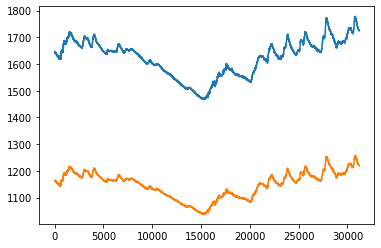

In [ ]:
plt.plot(SC)
plt.plot(result)

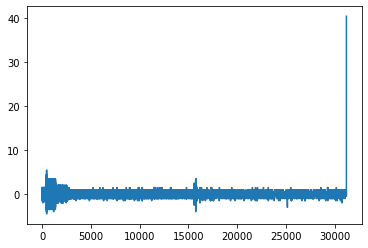

In [ ]:
plt.plot(cD1)

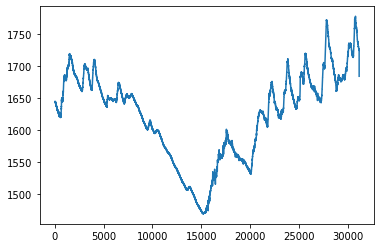

In [ ]:
plt.plot(cA1)